In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\pc\Desktop\job_placement.csv")
df

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...
695,696,Lucas Taylor,Male,23,Bachelor's,Computer Science,University of Washington,Placed,67000,3.8,3.0
696,697,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
697,698,Aiden Davis,Male,24,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0
698,699,Mia Wilson,Female,23,Bachelor's,Electrical Engineering,University of Colorado--Boulder,Placed,66000,3.7,2.0


In [3]:
df.drop("id", axis=1, inplace=True)
df

,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...,...,...
695,Lucas Taylor,Male,23,Bachelor's,Computer Science,University of Washington,Placed,67000,3.8,3.0
696,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
697,Aiden Davis,Male,24,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0
698,Mia Wilson,Female,23,Bachelor's,Electrical Engineering,University of Colorado--Boulder,Placed,66000,3.7,2.0


In [4]:
df.describe()

,age,salary,gpa,years_of_experience
count,700.000000,700.000000,700.000000,699.000000
mean,24.411429,52474.285714,3.750429,2.177396
std,1.164268,25160.331005,0.121212,0.779393
min,23.000000,0.000000,3.400000,1.000000
25%,23.000000,61000.000000,3.700000,2.000000
50%,24.000000,64000.000000,3.800000,2.000000
75%,26.000000,66000.000000,3.900000,3.000000
max,26.000000,68000.000000,3.900000,3.000000


In [5]:
df.isna().sum()

name                   0
gender                 0
age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    1
dtype: int64

In [7]:
df["years_of_experience"].fillna(df["years_of_experience"].median(), inplace=True)
df.head()

,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0


# Placements


In [27]:
placed_count = (df['placement_status'] == 'Not Placed').sum()
placed_count

130

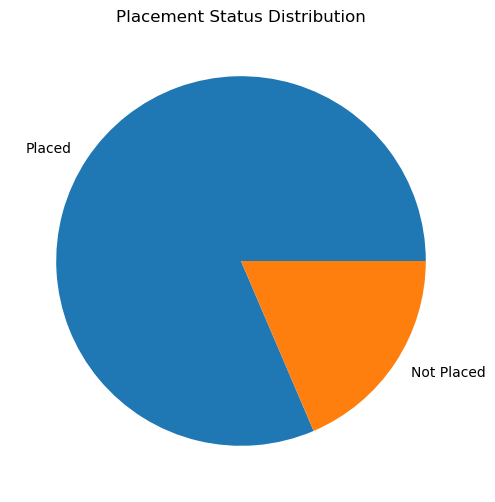

In [38]:
placement= df['placement_status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(placement, labels=placement.index)
plt.title('Placement Status Distribution')
plt.show()

# **Placement Results by Academic Streams**

In [14]:
stream = df.groupby('stream')['placement_status'].value_counts().unstack(fill_value=0)
stream

placement_status,Not Placed,Placed
stream,,
Computer Science,53,161
Electrical Engineering,22,90
Electronics and Communication,10,101
Information Technology,24,128
Mechanical Engineering,21,90


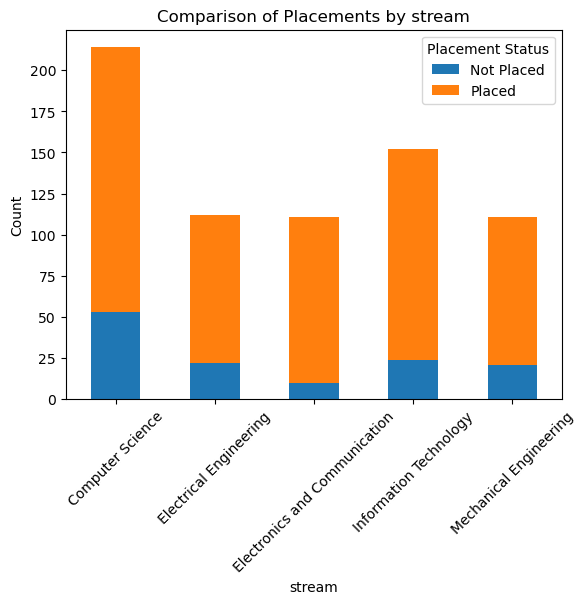

In [17]:
stream.plot(kind='bar', stacked=True)
plt.title('Comparison of Placements by stream')
plt.xlabel('stream')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Placement Status')
plt.show()


# **Successful Placements based of Colleges**

In [23]:
college_name = df[df['placement_status'] == 'Placed'].groupby('college_name').size()
college_name

college_name
California Institute of Technology            1
Columbia University                           1
Duke University                               1
Georgetown University                         1
Harvard University                            1
Massachusetts Institute of Technology         1
Northwestern University                       1
Princeton University                          1
Rice University                               1
Stanford University                           1
University of California--Berkeley           43
University of California--Davis               1
University of California--Irvine              1
University of California--Los Angeles        23
University of California--San Diego          10
University of California--San Francisco      34
University of California--Santa Barbara       1
University of California--Santa Cruz         34
University of Colorado--Boulder              43
University of Connecticut                    33
University of Delaware     

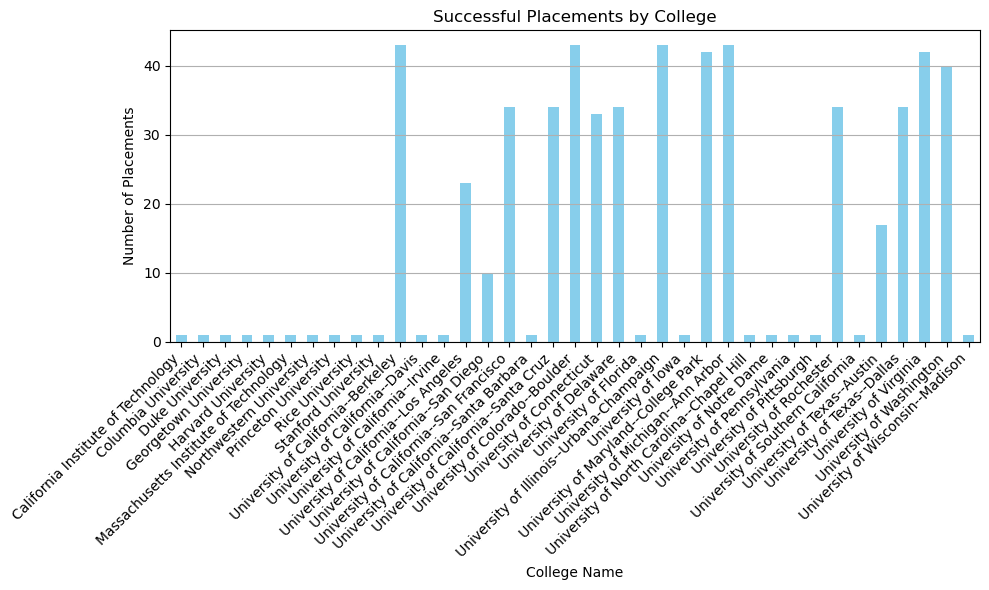

In [24]:
plt.figure(figsize=(10, 6))
college_name.plot(kind='bar', color='skyblue')
plt.title('Successful Placements by College')
plt.xlabel('College Name')
plt.ylabel('Number of Placements')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [26]:
placement_counts = df[df['placement_status'] == 'Placed'].groupby('college_name').size()
college_with_highest_placement = placement_counts.idxmax()
college_with_highest_placement

'University of California--Berkeley'

# **Exploring Factors Affecting Placement Status**

C:\Users\pc\AppData\Local\Temp\ipykernel_3824\257364461.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



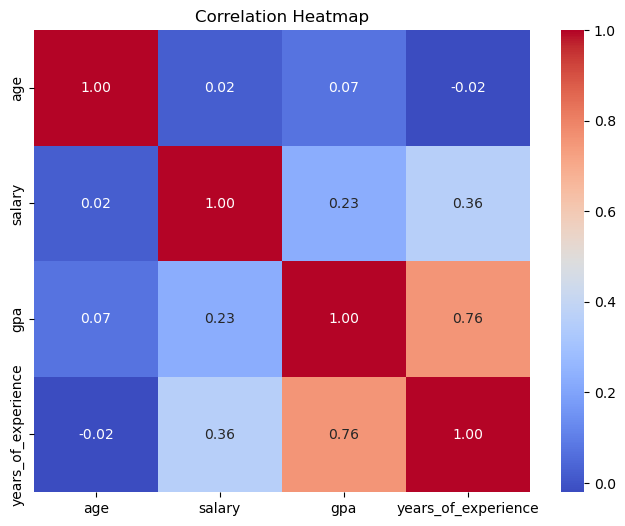

In [35]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Salary Distribution Among Placed Candidates

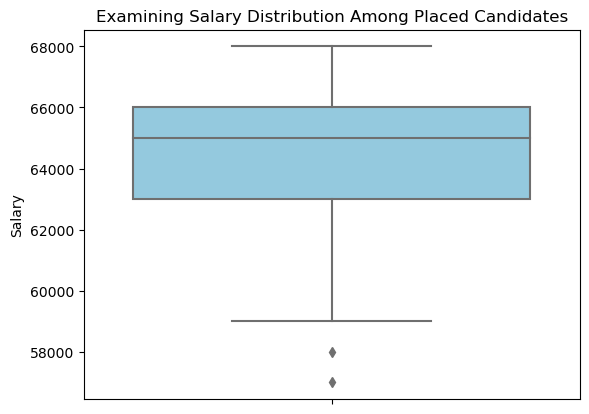

In [40]:
placement_salary= df[df['placement_status'] == 'Placed']
sns.boxplot(data=placement_salary, y='salary', color='skyblue')
plt.title('Examining Salary Distribution Among Placed Candidates')
plt.ylabel('Salary')
plt.show()

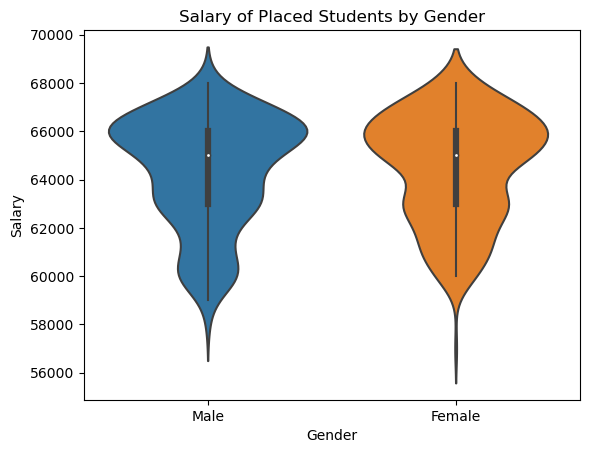

In [42]:
placed= df[df['placement_status'] == 'Placed']
sns.violinplot(data=placed, x='gender', y='salary')
plt.title('Salary of Placed Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

# Closure

1.Placement Rates: The majority of students from the dataset have been successfully placed in jobs, 
    as indicated by the placement status.

2.Top Colleges: Institutions such as Harvard University, Massachusetts Institute of Technology (MIT), 
    and Stanford University appear to have high placement rates, while others have lower rates.

3.Stream Influence: Students from streams such as Computer Science and Electrical Engineering seem to 
    have higher placement rates compared to others.

4.Gender Impact: Gender does not appear to have a significant impact on placement rates based on the 
    available data. Both male and female students have similar opportunities for placement.

5.Factors Influencing Salary: Factors such as GPA, years of experience, and field of study may influence 
    the salary offered to placed students. Generally, students with higher GPAs and more years of experience 
    tend to receive higher salaries.

6.Salary Distribution: The salary distribution among placed students varies, with some students receiving 
    higher salaries than others. This variation could be influenced by factors such as academic performance,
    college reputation, and individual negotiation skills.